In [ ]:
#pip install pandas

We find the Pick up/Drop off Peak and off-Peak hours by grouping the data by hour,from midnight(represented by 0) to 11 p.m.(represented by 23).

/Users/pairtubby/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


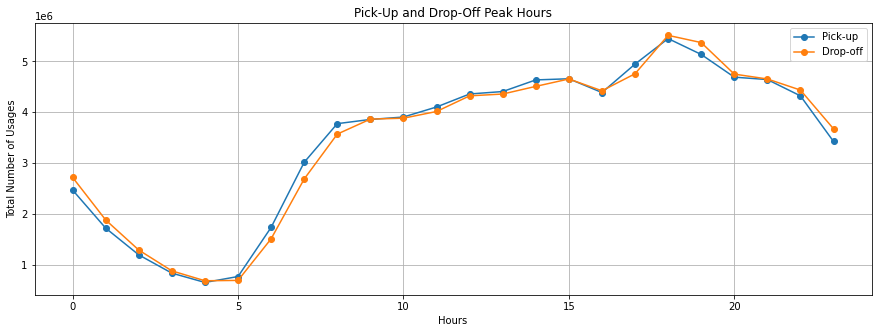

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
count_PU = []
count_DO =[]
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    filename = 'yellow_tripdata_2019-'+ month +'.csv'
    with open(filename) as csvfile:
        df =pd.read_csv(filename)
        df =df.drop(['VendorID','congestion_surcharge','store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','improvement_surcharge'],axis =1)
        dt_PU = pd.to_datetime(df['tpep_pickup_datetime'])
        dt_DO = pd.to_datetime(df['tpep_dropoff_datetime'])
        df['tpep_pickup_datetime'] =dt_PU
        df['tpep_dropoff_datetime'] = dt_DO
        df['pickup']=df['tpep_pickup_datetime']
        diff= (dt_DO-dt_PU)
        df['time_length_minute']=(diff.dt.seconds)/60.0
        df =df.drop(['passenger_count','RatecodeID'],axis =1)
        dq = df.groupby([dt_PU.dt.hour]).size().reset_index(name='counts')
        dz = df.groupby([dt_DO.dt.hour]).size().reset_index(name='counts')
        dq = dq.rename(columns={'tpep_pickup_datetime':'hours'})
        dz = dz.rename(columns={'tpep_pickup_datetime': 'hours'})
        count_PU.append(dq['counts'].tolist())
        count_DO.append(dz['counts'].tolist())
#print(count_PU)
#print(count_DO)
a = [sum(i) for i in zip(*count_PU)]
b = [sum(i) for i in zip(*count_DO)]
h = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#print(a)
#print(b)
df_plot = pd.DataFrame(list(zip(a, b,h)),columns =['Pick-up', 'Drop-off','Hours'])
#print(df_plot)
template = pd.DataFrame(["{0:0=2d}".format(x) for x in range(0, 24)], columns=["Hours"])
ax = df_plot.plot(x='Hours', y=['Pick-up','Drop-off'], kind='line', style="-o", figsize=(15, 5),grid = True)
ax.set_title("Pick-Up and Drop-Off Peak Hours")
ax.set_ylabel("Total Number of Usages")
plt.show()


 

In [ ]:
#pip install pyshp

We find the most pick-up and drop-off zones by counting the appearence of LocationID in the data and sort them out.
PU_allstar and DO_allstar are nested lists showing each month's top 5 places.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import shapefile
plt.style.use('ggplot')
import numpy as np
from itertools import chain
from collections import Counter
PU_allstar =[]
DO_allstar =[]

for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    filename = 'yellow_tripdata_2019-'+ month +'.csv'
    with open(filename) as csvfile:
        df =pd.read_csv(filename)
        #print(df.head())
        df =df.drop(['VendorID','congestion_surcharge','store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','improvement_surcharge'],axis =1)
        PU_location = df['PULocationID']
        DO_location = df['DOLocationID']
        PU_count = df['PULocationID'].value_counts().sort_values()
        DO_count = df['DOLocationID'].value_counts().sort_values()
        dq = pd.DataFrame()
        dq['PUcount'] =PU_count
        dq['DOcount'] = DO_count
        dq.reset_index(inplace=True)
        dq.rename(columns={'index':'LocationID'}, inplace=True)
        PUtop5 = dq.sort_values(by = ['PUcount'], ascending=False).head(5)
        PU_TOP = PUtop5.LocationID.tolist()
        PU_allstar.append(PU_TOP)
        DOtop5 = dq.sort_values(by=['DOcount'], ascending=False).head(5)
        DO_TOP = DOtop5.LocationID.tolist()
        DO_allstar.append(DO_TOP)

print(PU_allstar)
print(DO_allstar)

/Users/pairtubby/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[[237, 236, 161, 162, 230], [237, 161, 236, 162, 186], [161, 237, 162, 236, 230], [237, 161, 236, 162, 186], [237, 236, 161, 162, 186], [237, 161, 236, 162, 186], [161, 237, 186, 162, 132], [161, 186, 132, 162, 237], [237, 236, 161, 186, 132], [237, 161, 236, 162, 186], [237, 161, 236, 186, 230], [237, 236, 161, 186, 162]]
[[236, 237, 161, 170, 162], [236, 161, 237, 170, 162], [161, 236, 237, 170, 230], [236, 237, 161, 170, 230], [236, 237, 161, 230, 170], [236, 161, 237, 170, 230], [161, 236, 237, 230, 170], [161, 230, 237, 170, 236], [236, 237, 161, 170, 230], [236, 237, 161, 170, 230], [236, 237, 161, 230, 170], [236, 237, 161, 230, 162]]


from each month we look at those places and then count the occurrance of the places over 12 months 

In [9]:

a = list(chain.from_iterable(PU_allstar))
PUcount=dict(Counter(a))
print(PUcount)
b = list(chain.from_iterable(DO_allstar))
DOcount = dict(Counter(b))
print(DOcount)
draw_PU_count= list(Counter(a).values())
draw_PU =list(Counter(a).keys())
draw_DO_count= list(Counter(b).values())
draw_DO =list(Counter(b).keys())

{237: 12, 236: 10, 161: 12, 162: 10, 230: 3, 186: 10, 132: 3}
{236: 12, 237: 12, 161: 12, 170: 11, 162: 3, 230: 10}


Prepare shapefile data to plot the map

In [4]:
sf = shapefile.Reader("taxi_zones.shp")
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))


In [ ]:
#pip install shapely


In [ ]:
#pip install descartes

In [5]:
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import matplotlib as mpl

function to draw map

In [6]:
def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=(min(heat.values())-1),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace((min(heat.values())-1),max(heat.values()),8),
                     boundaries=np.arange((min(heat.values())-1)-10,max(heat.values())+10,.1))
    
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        nparts = len(shape.parts)
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: 
            for ip in range(nparts): 
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='left', verticalalignment='left')            
        elif len(text) != 0 and loc_id in text:
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x-10000, y-100),color="white", fontsize=9,horizontalalignment='right', verticalalignment='top',bbox=dict(pad=0,fc='black',alpha=0.5))
    

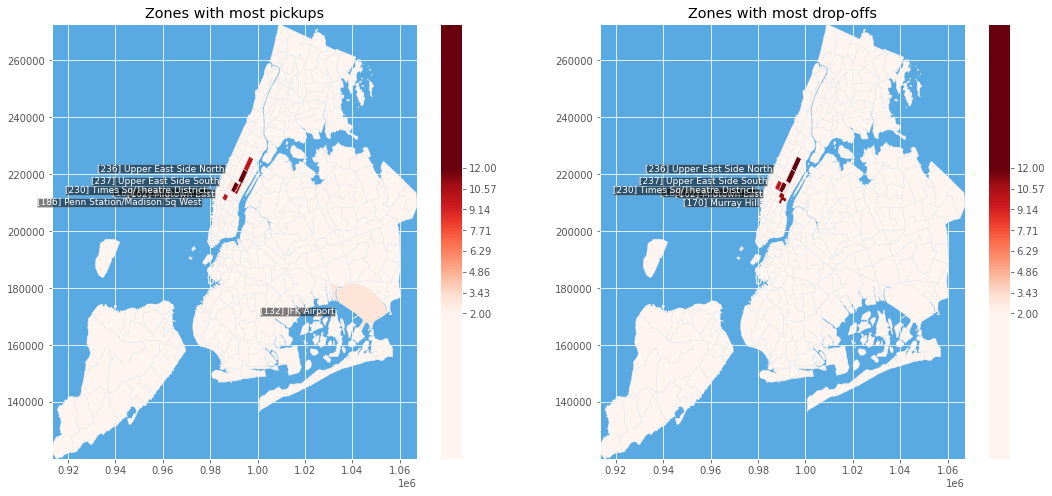

In [8]:
sf = shapefile.Reader("taxi_zones.shp")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Zones with most pickups")
draw_zone_map(ax, sf, heat=PUcount, text=draw_PU)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones with most drop-offs")
draw_zone_map(ax, sf, heat=DOcount, text=draw_DO)
